# Implementation of Batch and Stochastic Gradient descent techniques in customized way for the below mentioned dataset

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
df = pd.read_csv("Banglore_Prices.csv")
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [116]:
from sklearn.preprocessing import MinMaxScaler 

In [117]:
sx = MinMaxScaler()
sy = MinMaxScaler()

In [118]:
scaled_X = sx.fit_transform(df.drop('price',axis = 'columns'))

In [119]:
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [120]:
scaled_y = sy.fit_transform(df.price.values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [121]:
def batch_gradient_descent(X,y_true,epochs,lr = 0.01):
    no_of_feature = X.shape[1]
    w = np.ones(shape = (no_of_feature)) # 1X2
    b = 0 
    total_samples = X.shape[0] #20
    
    costl = []
    epoch = []
    
    for i in range(epochs):
        ypred = np.dot(w,scaled_X.T) + b   #  1X2   2X20  =  1X20
#         ypred = sigmoid_numpy(weighted_sum)
        w_grad = -(2/total_samples)*(X.T.dot(y_true-ypred))  #2X20 
        b_grad = -(2/total_samples)*np.sum(y_true-ypred)

        w = w - w_grad*lr
        b = b - b_grad*lr
        cost = np.mean(np.square(y_true-ypred))
        
        if i%10==0:
                costl.append(cost)
                epoch.append(i)
    return w,b,cost,costl,epoch

In [122]:
w,b,cost,costl,epoch = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

# Graphical Representation for Batch gradient descent

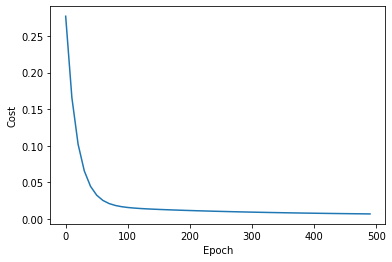

In [123]:
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(epoch,costl)

#### Predict Function can be used for any gradient descent techniques just weights and bias need to be changed

In [124]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area,bedrooms]])[0]
#     print(scaled_X)
    scaled_price = w[0]*scaled_X[0]+w[1]*scaled_X[1]+b
    return sy.inverse_transform([[scaled_price]])

#### Predicted output using Batch gradient descent

In [125]:
predict(1600,4,w,b)

array([[95.53697273]])

# Stochastic Gradient Descent

In [126]:
def stochastic_gradient_descent(X,y_true,epochs,lr = 0.01):
    no_of_features = X.shape[1]
    w = np.ones(no_of_features)
    b = 0
    tot_samples = X.shape[0]
    costl = []
    epoch = []
    for i in range(epochs):
        xh = np.random.randint(0,tot_samples-1)

       
        sample_x = X[xh]
        sample_y = y_true[xh]
        ypred = np.dot(w,sample_x.T) + b

        w_grad = -(2/tot_samples)*(sample_x.T.dot(sample_y-ypred))
        b_grad = -(2/tot_samples)*(sample_y-ypred)

        w = w-w_grad*lr
        b = b-b_grad*lr

        cost = np.square(sample_y - ypred)

        if i%100==0:
            costl.append(cost)
            epoch.append(i)
    return w,b,cost,costl,epoch        
    

In [127]:
w_sgd,b_sgd,cost1,costl1,epoch1  = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)

In [128]:
w1,b1,cost1

(array([0.7217789 , 0.70522323]), -0.26130681947574846, 0.0014315648720916322)

# Graphical representation for stochastic gradient descent

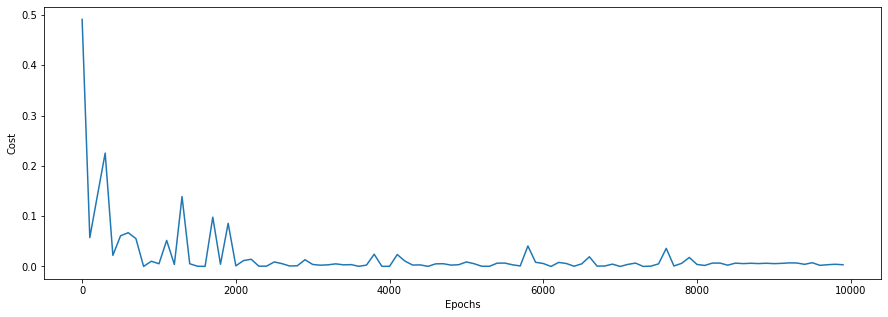

In [129]:
plt.figure(figsize=(15,5))

plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(epoch1,costl1)


#### Predicted output using SGD

In [130]:
predict(2500,5,w_sgd,b_sgd)

array([[149.16390291]])